# Happiness _Index 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [5]:
happy=pd.read_csv("happiness.csv")
happy.set_index('Country',inplace=True)

In [6]:
happy

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


Exploratory Data Analysis 

In [7]:
df=pd.DataFrame(happy)

In [8]:
df.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

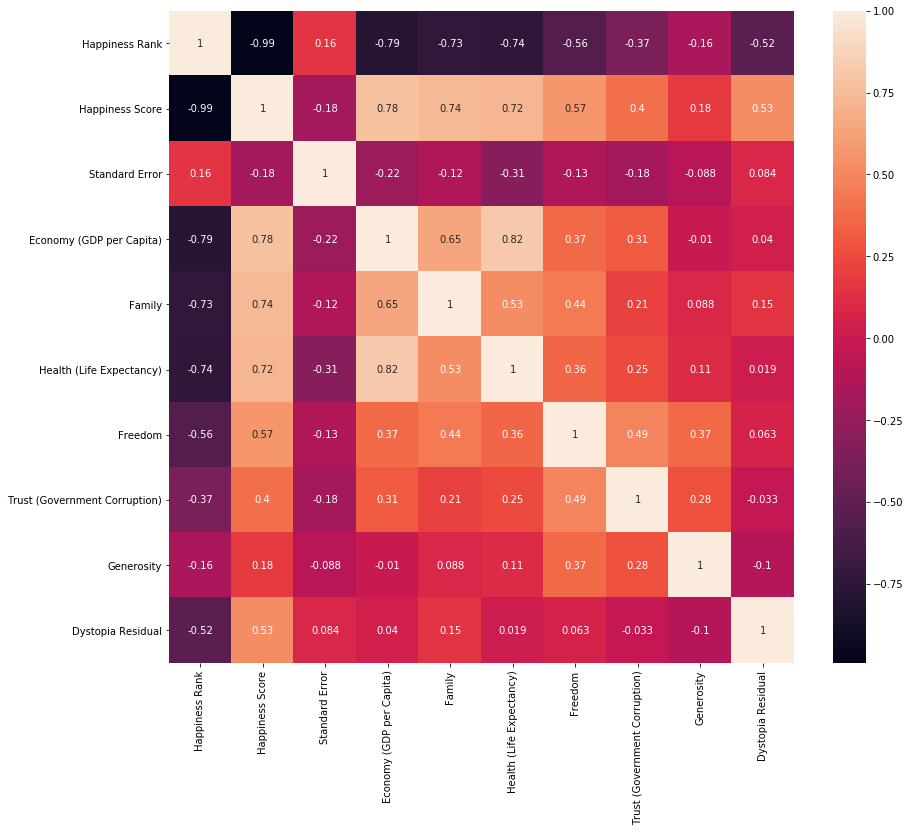

In [10]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

In [11]:
df.drop(['Region', 'Happiness Rank'],axis=1,inplace=True)

In [12]:
df.head(2)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Switzerland,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [13]:
df.columns


Index(['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype='object')

In [14]:
df.dtypes

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

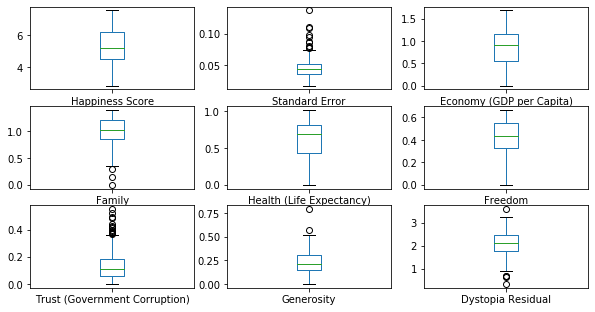

In [15]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,7))
plt.show()

In [16]:
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [17]:
y=df['Happiness Score']
x=df.drop('Happiness Score',axis=1)

In [18]:
x.columns

Index(['Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [19]:
x.skew()

Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

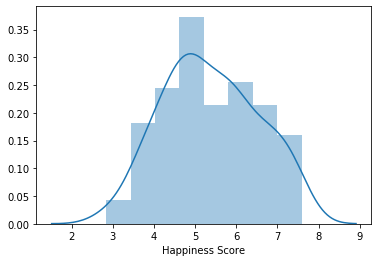

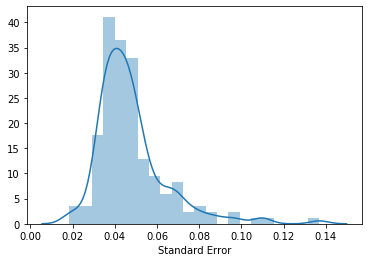

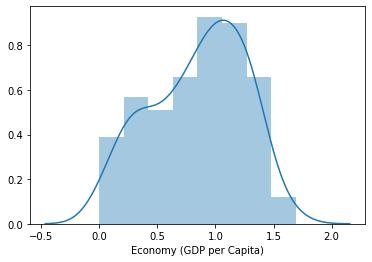

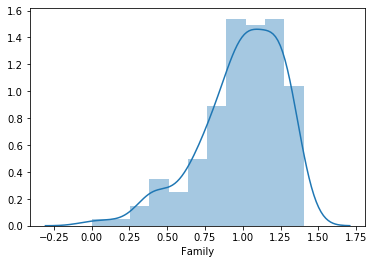

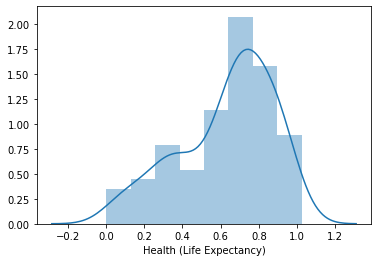

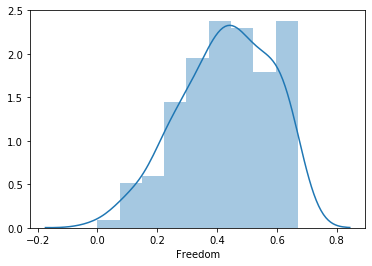

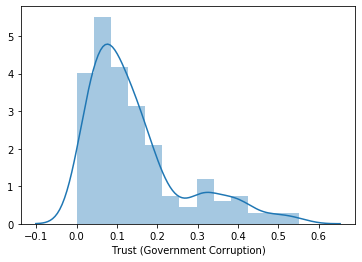

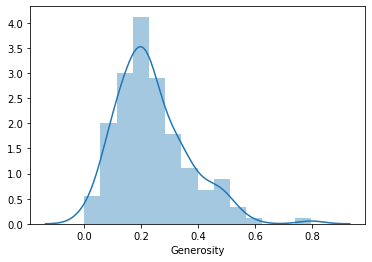

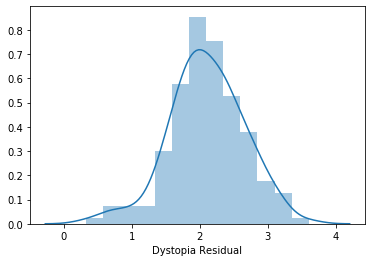

In [20]:
columns=['Happiness Score', 'Standard Error', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

In [21]:
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [22]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
...,...,...,...,...,...,...,...,...
153,0.136429,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314,0.104425
154,0.152638,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432,0.398557
155,0.267370,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790,0.000000
156,0.574926,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864,0.459573


Model making and Prediction

In [23]:
lr=LinearRegression()

In [24]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print("Best accuracy is ",maxr2," on Random_state ",maxRS)

Best accuracy is  0.9999999641035279  on Random_state  148


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=148)

In [26]:
x_train.shape

(110, 8)

In [27]:
x_test.shape

(48, 8)

In [28]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)


In [29]:
print(predlr)

[4.19434346 4.51781684 6.81023013 5.01309407 4.50720395 4.27066363
 7.52701688 6.78620475 6.79777047 4.89756747 4.07677292 6.75012827
 3.89657483 3.66725903 7.22564804 5.83273192 5.98709822 4.85765591
 5.87828533 4.56467091 7.28598847 6.93734686 5.70879757 6.66965503
 6.29816172 2.83892886 3.68089831 5.05720615 3.34001504 3.6777401
 3.9888383  5.82824063 3.93080442 4.86720167 7.19979373 4.30690075
 7.1872786  3.00632294 7.27768044 4.87594888 6.26921281 5.47699043
 4.97111373 7.52215762 3.84498095 6.41122311 6.12272917 4.33215455]


In [30]:
r2_score(y_test,predlr)

0.9999999641035279

In [31]:
joblib.dump(lr,'happiness_ind.obj') #dumping the value

['happiness_ind.obj']

In [32]:
happy=joblib.load('happiness_ind.obj') #loading the value
happy.predict(x_test)

array([4.19434346, 4.51781684, 6.81023013, 5.01309407, 4.50720395,
       4.27066363, 7.52701688, 6.78620475, 6.79777047, 4.89756747,
       4.07677292, 6.75012827, 3.89657483, 3.66725903, 7.22564804,
       5.83273192, 5.98709822, 4.85765591, 5.87828533, 4.56467091,
       7.28598847, 6.93734686, 5.70879757, 6.66965503, 6.29816172,
       2.83892886, 3.68089831, 5.05720615, 3.34001504, 3.6777401 ,
       3.9888383 , 5.82824063, 3.93080442, 4.86720167, 7.19979373,
       4.30690075, 7.1872786 , 3.00632294, 7.27768044, 4.87594888,
       6.26921281, 5.47699043, 4.97111373, 7.52215762, 3.84498095,
       6.41122311, 6.12272917, 4.33215455])